# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages.

In [2]:
!python -m pip install kaggle==1.6.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102970 sha256=4d032647e4646b56bc5711f1992b87ede758361082be301558b591fcb3eac0af
  Stored in directory: /root/.cache/pip/wheels/2a/00/63/fa8dbcfb1458e6a65ac7a28d456deb9e0e033245b67f952681
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [3]:
!pip install numpy ucimlrepo


**Note:** Restart the kernel to use updated package(s).

In [4]:
import os

# Make sure the 'datasets' folder exists
os.makedirs("datasets", exist_ok=True)

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
This project aims to explore the relationship between air pollution and chronic diseases in the United States from 2019 to 2024. We will analyze how air quality indicators, specifically PM2.5 levels, correlate with the prevalence of chronic diseases reported in the U.S. Chronic Disease Indicators (CDI) dataset. By combining and cleaning these two datasets, we aim to identify patterns and insights that could help inform public health strategies and policy decisions related to environmental health.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code).

Load the dataset programmtically into this notebook.

#### Dataset 1

**Type:** CSV file

**Method:** The data was gathered manually and uploaded to the project folder.

**Dataset variables:**

* `State`: The U.S. state where the data was collected.
* `Indicator`: Type of chronic disease (e.g., diabetes, obesity).
* `Data_Value`: The percentage of the population affected by the disease.


In [5]:
import pandas as pd

# Load Dataset 1: US Chronic Disease Indicators (CDI) - 2023
cdi_df = pd.read_csv(
    "datasets/U.S._Chronic_Disease_Indicators__CDI.csv",
    low_memory=False
)

# Show the first 5 rows
print(cdi_df.head())

# Basic info
cdi_df.info()


   YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

  LocationID  TopicID QuestionID DataValueTypeID  Stratificati

#### Dataset 2

**Type:** CSV file

**Method:** The data was gathered programmatically by downloading daily PM2.5 measurements from the U.S. EPA Air Quality System (AQS) for the years 2010–2024, then combined into a single dataset.

**Dataset variables:**

* `State Name`: The U.S. state where air quality data was measured.
* `County Name`: The county where the measurement site is located.
* `City Name`: The city where the measurement site is located.
* `Date Local`: The day of measurement.
* `AQI`: The Air Quality Index value for that site on that day (based on PM2.5 concentration).
* `Parameter Name`: The pollutant measured (PM2.5 for this dataset).
* `Latitude` / `Longitude`: Geographic coordinates of the measurement site.
* `Observation Count` / `Arithmetic Mean` / `1st Max Value`: Statistical measures of the pollutant concentration for that day.
* `Year`: The measurement year (2010–2024).


In [6]:
import requests
import pandas as pd
import os
from tqdm import tqdm  # for progress bar

# Make sure the 'datasets' folder exists
os.makedirs("datasets", exist_ok=True)

base_url = "https://aqs.epa.gov/aqsweb/airdata/daily_88101_{}.zip"
years = range(2019, 2025)  # from 2019 to 2024

all_data_df = []

# Wrap the years loop with tqdm for progress visualization
for year in tqdm(years, desc="Downloading EPA data", ncols=100):
    try:
        url = base_url.format(year)

        # Download and read CSV directly from URL
        df = pd.read_csv(url, low_memory=False)
        df["Year"] = year  # Add a column for the year
        all_data_df.append(df)
    except Exception as e:
        print(f"❌ Failed to download data for {year}: {e}")

# Combine all years into a single DataFrame
epa_all_years_df = pd.concat(all_data_df, ignore_index=True)

# Save the combined dataset
epa_all_years_df.to_csv("datasets/daily_88101_2019_2024.csv", index=False)
print("✅ Saved combined dataset: datasets/daily_88101_2019_2024.csv")
print("Shape:", epa_all_years_df.shape)


✅ Saved combined dataset: datasets/daily_88101_2019_2024.csv
Shape: (4589067, 30)


In [7]:
import pandas as pd

# Load Dataset 2
epa_df = pd.read_csv(
    "datasets/daily_88101_2019_2024.csv",
    low_memory=False
)

# Show the first 5 rows
print(epa_df.head())

# Basic info
epa_df.info()


   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           88101    1  30.497478   
1           1            3        10           88101    1  30.497478   
2           1            3        10           88101    1  30.497478   
3           1            3        10           88101    1  30.497478   
4           1            3        10           88101    1  30.497478   

   Longitude  Datum            Parameter Name Sample Duration  ...  \
0 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ...   
1 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ...   
2 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ...   
3 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ...   
4 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ...   

  Method Code                                        Method Name  \
0         145  R & P Model 2025 PM-2.5 Sequential Air Sampler...   
1         

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [8]:
import os
import shutil

# Create a folder to store raw data if it doesn't exist
data_store_dir = "data_store"
os.makedirs(data_store_dir, exist_ok=True)

# List of files to copy: (source path, destination filename)
files_to_store = [
    ("datasets/U.S._Chronic_Disease_Indicators__CDI.csv", "U.S._Chronic_Disease_Indicators__CDI.csv"),
    ("datasets/daily_88101_2019_2024.csv", "daily_88101_2019_2024.csv")
]

# Copy files to the data_store folder
for src, dst in files_to_store:
    if os.path.exists(src):
        shutil.copy(src, os.path.join(data_store_dir, dst))
        print(f"✅ Copied {src} -> {data_store_dir}/{dst}")
    else:
        print(f"❌ File not found: {src}")

print("Raw datasets have been stored in the 'data_store' folder.")


✅ Copied datasets/U.S._Chronic_Disease_Indicators__CDI.csv -> data_store/U.S._Chronic_Disease_Indicators__CDI.csv
✅ Copied datasets/daily_88101_2019_2024.csv -> data_store/daily_88101_2019_2024.csv
Raw datasets have been stored in the 'data_store' folder.


#### Data Assessment: Missing Values in `DataValue` (Dataset 1)

After loading the **US Chronic Disease Indicators (CDI)** dataset, we first check for missing values in critical columns.  
The `DataValue` column is a key variable representing the percentage of the population affected by chronic diseases.

This section calculates:

- The total number of missing values in `DataValue`.
- The percentage of missing values relative to the total number of rows.

Understanding the extent of missing data is essential before proceeding to cleaning and analysis.


In [9]:
# Display all column names as a list
print(list(cdi_df.columns))


['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


In [10]:
# Total number of rows in the dataset
total_rows = len(cdi_df)

# Count missing values in DataValue
missing_values = cdi_df['DataValue'].isnull().sum()

# Calculate the percentage of missing values
missing_percent = (missing_values / total_rows) * 100

# Display the results
print(f"Missing values in 'DataValue': {missing_values} out of {total_rows} rows")
print(f"Percentage of missing 'DataValue': {missing_percent:.2f}%")


Missing values in 'DataValue': 23997 out of 50420 rows
Percentage of missing 'DataValue': 47.59%


#### **Data Assessment: Missing Values in PM2.5 (Dataset 2)**

For the **U.S. Air Quality** dataset, we assess missing values in the `AQI` column specifically for measurements where the pollutant is **PM2.5**.  
PM2.5 represents fine particulate matter in the air — a key indicator of air pollution that has significant health impacts.

Checking for missing or incomplete `AQI` values for PM2.5 helps identify potential gaps in air quality monitoring across different states and cities.


In [11]:
# Display all column names as a list
print(list(epa_df.columns))

['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type', 'Observation Count', 'Observation Percent', 'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name', 'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name', 'Date of Last Change', 'Year']


In [12]:
# Filter dataset for PM2.5 measurements
pm25_df = epa_df[epa_df['Parameter Name'].str.contains('PM2.5', case=False, na=False)]

# Total number of PM2.5 rows
total_pm25_rows = len(pm25_df)

# Count missing values in AQI
missing_aqi = pm25_df['AQI'].isnull().sum()

# Calculate percentage of missing values
missing_aqi_percent = (missing_aqi / total_pm25_rows) * 100

# Display the results
print(f"Missing values in 'AQI' for PM2.5: {missing_aqi} out of {total_pm25_rows} rows")
print(f"Percentage of missing 'AQI' for PM2.5: {missing_aqi_percent:.2f}%")


Missing values in 'AQI' for PM2.5: 2103765 out of 4589067 rows
Percentage of missing 'AQI' for PM2.5: 45.84%


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [13]:
# Inspecting the dataframe visually
# Visual inspection of the first few rows
print(cdi_df.head())

# Check random rows to spot anomalies
print(cdi_df.sample(10))


   YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

  LocationID  TopicID QuestionID DataValueTypeID  Stratificati

In [14]:
# Inspecting the dataframe programmatically
# Check for missing values
print(cdi_df.isnull().sum())

# Check data types and ranges
print(cdi_df.info())
print(cdi_df.describe())


YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Topic                            0
Question                         0
Response                     50420
DataValueUnit                13647
DataValueType                    0
DataValue                    23997
DataValueAlt                 24300
DataValueFootnoteSymbol      25366
DatavalueFootnote            25366
LowConfidenceLimit           32553
HighConfidenceLimit          32553
StratificationCategory1          1
Stratification1                  1
StratificationCategory2      50420
Stratification2              50420
StratificationCategory3      50420
Stratification3              50420
GeoLocation                    247
ResponseID                   50420
LocationID                       1
TopicID                          1
QuestionID                       1
DataValueTypeID                  1
StratificationCatego

**Quality Issue 1: Missing Values in `DataValue` (Dataset 1)**

The `DataValue` column contains a large number of missing values (23,997 out of 50,420 rows, ~47.6%). Additionally, related columns such as `Response` and several stratification columns are mostly or entirely empty. This constitutes a data quality issue because missing or incomplete critical values can distort analyses, such as calculating averages, trends, or correlations.

Both visual inspection (observing NaN values in `head()` and `sample()` outputs) and programmatic checks (`isnull().sum()` and `describe()`) confirm the presence and extent of missing data, indicating a major completeness issue in the dataset.


### Quality Issue 2:

In [15]:
# Inspecting the dataframe visually
# Visual inspection of the 'GeoLocation' column
print(cdi_df[['LocationDesc', 'GeoLocation']].head(10))

# Random sample to check for anomalies or inconsistencies
print(cdi_df[['LocationDesc', 'GeoLocation']].sample(10))


           LocationDesc                                     GeoLocation
0              Arkansas    POINT (-92.27449074299966 34.74865012400045)
1              Colorado  POINT (-106.13361092099967 38.843840757000464)
2  District of Columbia                    POINT (-77.036871 38.907192)
3               Georgia    POINT (-83.62758034599966 32.83968109300048)
4              Michigan     POINT (-84.71439026999968 44.6613195430005)
5               Montana   POINT (-109.42442064499971 47.06652897200047)
6                Oregon   POINT (-120.15503132599969 44.56744942400047)
7           Puerto Rico                    POINT (-66.590149 18.220833)
8           Puerto Rico                    POINT (-66.590149 18.220833)
9             Wisconsin    POINT (-89.81637074199966 44.39319117400049)
        LocationDesc                                     GeoLocation
14847           Ohio    POINT (-82.40426005599966 40.06021014100048)
10009    Connecticut    POINT (-72.64984095199964 41.56266102000046)
1

In [16]:
# Inspecting the dataframe programmatically
# Count missing values in 'GeoLocation'
missing_geo = cdi_df['GeoLocation'].isnull().sum()

# Check unique values to spot inconsistent formats
unique_geo = cdi_df['GeoLocation'].nunique()

# Display results
print(f"Missing values in 'GeoLocation': {missing_geo} out of {len(cdi_df)} rows")
print(f"Number of unique GeoLocation entries: {unique_geo}")


Missing values in 'GeoLocation': 247 out of 50420 rows
Number of unique GeoLocation entries: 54


**Quality Issue 2: Missing and Inconsistent Values in `GeoLocation` (Dataset 1)**

The `GeoLocation` column contains a small number of missing values (247 out of 50,420 rows, ~0.49%) and some inconsistencies in format, such as variations in how latitude and longitude are recorded (e.g., different decimal precision or spacing).

This constitutes a data quality issue because inaccurate or missing location data can affect spatial analyses, mapping, or merging with other datasets. Both visual inspection (observing `head()` and random sample outputs) and programmatic checks (counting missing values with `isnull().sum()` and checking the number of unique entries with `nunique()`) confirm the presence and extent of these issues.


### Quality Issue 3:

In [17]:
# Visual inspection of PM2.5 dataset
# Show first 10 rows to check the structure and potential missing values
print(pm25_df.head(10))

# Check random 10 rows to spot anomalies in AQI or location
print(pm25_df[['State Name', 'City Name', 'AQI']].sample(10))


   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           88101    1  30.497478   
1           1            3        10           88101    1  30.497478   
2           1            3        10           88101    1  30.497478   
3           1            3        10           88101    1  30.497478   
4           1            3        10           88101    1  30.497478   
5           1            3        10           88101    1  30.497478   
6           1            3        10           88101    1  30.497478   
7           1            3        10           88101    1  30.497478   
8           1            3        10           88101    1  30.497478   
9           1            3        10           88101    1  30.497478   

   Longitude  Datum            Parameter Name Sample Duration  ...  \
0 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ...   
1 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR  ... 

In [18]:
# Programmatic inspection

# 1. Check missing values in AQI
missing_aqi = pm25_df['AQI'].isnull().sum()

# 2. Check number of unique AQI values
unique_aqi = pm25_df['AQI'].nunique()

# 3. Check for duplicates
duplicates = pm25_df.duplicated().sum()

# 4. Check for negative or invalid AQI values
invalid_aqi = (pm25_df['AQI'] < 0).sum()

# Display results
print(f"Missing values in 'AQI': {missing_aqi} out of {len(pm25_df)} rows")
print(f"Number of unique AQI entries: {unique_aqi}")
print(f"Number of duplicate rows: {duplicates}")
print(f"Number of invalid AQI (<0) entries: {invalid_aqi}")


Missing values in 'AQI': 2103765 out of 4589067 rows
Number of unique AQI entries: 451
Number of duplicate rows: 0
Number of invalid AQI (<0) entries: 0


#### Issue and Justification: Dataset 2 (PM2.5 AQI)

**Quality Issue 1: Missing AQI Values**  
The `AQI` column for PM2.5 contains 2,103,765 missing values out of 4,589,067 rows (~45.84%). Missing values can significantly impact analyses such as calculating average air quality, identifying trends, or comparing pollution levels across cities and states. Both visual inspection (`head()` and `sample()`) and programmatic checks (`isnull().sum()`) confirm the presence and extent of missing data.

**Quality Issue 2: Invalid AQI Values**  
No negative or obviously invalid AQI values were detected, but the presence of missing entries and potential outliers in extremely high values may affect analysis accuracy. Programmatic filtering (`AQI < 0`) ensures that invalid measurements are identified, providing confidence in data integrity.

**Justification of Methods:**  
- **Visual Inspection:** Quick identification of missing values and anomalies through `head()` and `sample()` outputs.  
- **Programmatic Checks:** Precise counts and verification using `isnull()`, `nunique()`, `duplicated()`, and conditional filtering ensure comprehensive assessment of data quality issues.


### Tidiness Issue 1:

In [19]:
# Visual inspection of the dataframe for tidiness issues
# Display first few rows to see if multiple variables are stored in a single column
print(cdi_df[['DataValue', 'DataValueAlt', 'DataValueType']].head(10))

# Display random sample to check for inconsistencies or repeated variables
print(cdi_df[['DataValue', 'DataValueAlt', 'DataValueType']].sample(10))


  DataValue  DataValueAlt DataValueType
0       916         916.0        Number
1      2227        2227.0        Number
2       708         708.0        Number
3      3520        3520.0        Number
4       123         123.0        Number
5       NaN           NaN        Number
6       760         760.0        Number
7       NaN           NaN        Number
8       NaN           NaN        Number
9      1967        1967.0        Number
      DataValue  DataValueAlt      DataValueType
33513       NaN           NaN         Crude Rate
40270       NaN           NaN             Number
26532       NaN           NaN             Number
32028       NaN           NaN  Age-adjusted Rate
4000       65.5          65.5   Crude Prevalence
17267       NaN           NaN  Age-adjusted Rate
15587      15.0          15.0  Age-adjusted Rate
7675        7.5           7.5  Age-adjusted Rate
42266       NaN           NaN  Age-adjusted Rate
9439       36.5          36.5   Crude Prevalence


In [20]:
# Check unique values to identify if multiple measures are stored in the same column
print(cdi_df['DataValueType'].unique())

# Count rows where DataValueAlt exists to see if there are duplicate or redundant measures
print(cdi_df['DataValueAlt'].notnull().sum())


['Number' 'Average Annual Number' 'Crude Prevalence' 'Age-adjusted Rate'
 'Local control of the regulation of alcohol outlet density' 'Crude Rate'
 'Age-adjusted Prevalence' 'US Dollars'
 'Commercial host (dram shop) liability status for alcohol service'
 'Per capita alcohol consumption' 'Average Annual Age-adjusted Rate'
 'Average Annual Crude Rate']
26120


#### Issue and justification:

The DataValue and DataValueAlt columns contain multiple types of measurements, as indicated by the DataValueType column. This is a tidiness issue because a single variable (“value”) is split across multiple columns instead of having one column for all values and another column specifying the type.

Both visual inspection (observing head() and random sample outputs) and programmatic checks (counting unique DataValueType entries and non-null values in DataValueAlt) confirm that multiple measurement types are mixed in the same rows. This violates the tidy data principle and complicates analysis, as each type of measurement should ideally be stored in its own row with a corresponding type identifier.

### Tidiness Issue 2:

In [21]:
# Visual inspection shows that StratificationCategoryID2, StratificationID2,
print(cdi_df[['StratificationCategoryID2', 'StratificationID2',
              'StratificationCategoryID3', 'StratificationID3']].head(10))
print(cdi_df[['StratificationCategoryID2', 'StratificationID2',
              'StratificationCategoryID3', 'StratificationID3']].sample(10))


   StratificationCategoryID2  StratificationID2  StratificationCategoryID3  \
0                        NaN                NaN                        NaN   
1                        NaN                NaN                        NaN   
2                        NaN                NaN                        NaN   
3                        NaN                NaN                        NaN   
4                        NaN                NaN                        NaN   
5                        NaN                NaN                        NaN   
6                        NaN                NaN                        NaN   
7                        NaN                NaN                        NaN   
8                        NaN                NaN                        NaN   
9                        NaN                NaN                        NaN   

   StratificationID3  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5  

In [22]:
# Programmatic inspection confirms that all rows in these columns are missing
print(cdi_df[['StratificationCategoryID2', 'StratificationID2',
              'StratificationCategoryID3', 'StratificationID3']].isnull().sum())

StratificationCategoryID2    50420
StratificationID2            50420
StratificationCategoryID3    50420
StratificationID3            50420
dtype: int64


#### Issue and Justification:

The columns StratificationCategoryID2, StratificationID2, StratificationCategoryID3, and StratificationID3 constitute a tidiness issue because multiple stratification levels are spread across separate, mostly empty columns rather than being consolidated into a single “Stratification Level” column with a corresponding value.

This violates tidy data principles, making analysis of stratified data unnecessarily complex. Both visual inspection (observing head() and random samples) and programmatic checks (counting missing values) confirm that these columns are redundant and not consistently populated.

### Tidiness Issue 3:

In [23]:
# Visual inspection of AQI data for tidiness issues
# Display first few rows to check if multiple measurements or variables are stored inconsistently
print(pm25_df[['State Name', 'City Name', 'AQI', 'Parameter Name', 'Sample Duration']].head(10))

# Random sample to check for repeated measurements or inconsistencies in columns
print(pm25_df[['State Name', 'City Name', 'AQI', 'Parameter Name', 'Sample Duration']].sample(10))


  State Name City Name   AQI            Parameter Name Sample Duration
0    Alabama  Fairhope  24.0  PM2.5 - Local Conditions         24 HOUR
1    Alabama  Fairhope  47.0  PM2.5 - Local Conditions         24 HOUR
2    Alabama  Fairhope  18.0  PM2.5 - Local Conditions         24 HOUR
3    Alabama  Fairhope  48.0  PM2.5 - Local Conditions         24 HOUR
4    Alabama  Fairhope  50.0  PM2.5 - Local Conditions         24 HOUR
5    Alabama  Fairhope  21.0  PM2.5 - Local Conditions         24 HOUR
6    Alabama  Fairhope  58.0  PM2.5 - Local Conditions         24 HOUR
7    Alabama  Fairhope  26.0  PM2.5 - Local Conditions         24 HOUR
8    Alabama  Fairhope  53.0  PM2.5 - Local Conditions         24 HOUR
9    Alabama  Fairhope  21.0  PM2.5 - Local Conditions         24 HOUR
             State Name      City Name    AQI            Parameter Name  \
964476         Michigan        Detroit   54.0  PM2.5 - Local Conditions   
3106923      California  San Francisco    NaN  PM2.5 - Local Conditio

In [24]:
# Programmatic check for duplicated measurements across same state, city, and date
duplicates_pm25 = pm25_df.duplicated(subset=['State Name', 'City Name', 'Date Local', 'Parameter Name']).sum()

# Display results
print(f"Number of duplicate measurements for PM2.5: {duplicates_pm25}")

Number of duplicate measurements for PM2.5: 3246488


### Issue and Justification:

In the PM2.5 dataset, a very large number of AQI measurements (3,246,488 duplicates) for the same location and parameter are stored in separate rows, often with different Sample Duration values. This violates the tidy data principle, which states that each variable should have its own column and each observation should occupy a single row.

This tidiness issue complicates analysis of daily or location-based trends, as data aggregation is required to consolidate multiple entries per location and date. Both visual inspection (observing head() and random samples) and programmatic checks (counting duplicates based on State, City, Date, and Parameter Name) confirm the extent of this redundancy, indicating a critical need to clean and restructure the dataset for proper analysis.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [25]:
# Step 3: Clean Data

# Make copies of the original datasets to preserve raw data
cdi_clean = cdi_df.copy()
pm25_clean = pm25_df.copy()


### **Quality Issue 1:**

In [26]:
### Quality Issue 1: Missing Data in DataValue

# Cleaning strategy:
# Remove rows where 'DataValue' is missing because these rows cannot be used in analysis
cdi_clean = cdi_clean.dropna(subset=['DataValue'])


In [27]:
# Validate that cleaning was successful
missing_after = cdi_clean['DataValue'].isnull().sum()
print(f"Missing values in 'DataValue' after cleaning: {missing_after}")


Missing values in 'DataValue' after cleaning: 0


#### Justification:

The 'DataValue' column is essential for analysis.  
Removing rows with missing values ensures that the dataset contains only complete and reliable entries,  
which prevents distorted calculations and avoids misleading results.


### **Quality Issue 2:**

In [31]:
# Remove rows where GeoLocation is missing
cdi_clean = cdi_clean.dropna(subset=['GeoLocation'])


In [32]:
#Validate the cleaning was successful
print("Missing values in 'GeoLocation' after cleaning:", cdi_clean['GeoLocation'].isnull().sum())

Missing values in 'GeoLocation' after cleaning: 0


#### Justification:

The 'GeoLocation' column is crucial for any spatial or location-based analysis.  
Removing rows with missing GeoLocation values ensures that the dataset only contains complete and reliable entries,  
which prevents errors or misinterpretation in mapping and geographic analyses.


### **Quality Issue 3:**  
Clean Dataset 2 (PM2.5 / AQI)

In [36]:
# --- Quality Issue 1: Missing AQI Values ---
# Remove rows where AQI is missing, because missing AQI cannot be used in analysis
pm25_clean = pm25_clean.dropna(subset=['AQI'])

# Validate cleaning
missing_aqi = pm25_clean['AQI'].isnull().sum()
print("Missing values in 'AQI' after cleaning:", missing_aqi)


Missing values in 'AQI' after cleaning: 0


### Justification
Removing rows with missing AQI ensures that analyses like average AQI calculations,
trends over time, and city/state comparisons are accurate and not biased.

In [37]:
# --- Quality Issue 2: Invalid AQI Values ---
# Ensure all AQI values are non-negative
pm25_clean = pm25_clean[pm25_clean['AQI'] >= 0]

# Validate cleaning
invalid_aqi_count = (pm25_clean['AQI'] < 0).sum()
print("Invalid AQI values after cleaning:", invalid_aqi_count)

Invalid AQI values after cleaning: 0


### Justification

The AQI (Air Quality Index) cannot be negative, as negative values are not physically meaningful.  
Filtering out any negative AQI values ensures the integrity and reliability of the dataset,  
preventing inaccurate analyses or misleading conclusions in air quality assessments.


In [40]:
# --- Quality Issue 3: Duplicate Measurements ---
# Remove duplicate AQI measurements for the same State, City, Date, and Parameter
# Keeping only the first occurrence ensures that each observation represents a unique measurement
pm25_clean = pm25_clean.drop_duplicates(subset=['State Name', 'City Name', 'Date Local', 'Parameter Name'])

# Validate cleaning
duplicate_count = pm25_clean.duplicated(subset=['State Name', 'City Name', 'Date Local', 'Parameter Name']).sum()
print("Duplicate AQI measurements after cleaning:", duplicate_count)  # Should be 0


Duplicate AQI measurements after cleaning: 0


#### Justification:

Duplicate AQI measurements for the same location, date, and parameter can distort analysis results,  
such as calculating daily averages or comparing air quality across cities and states.  
By removing duplicates, we ensure that each observation represents a unique and valid measurement,  
improving the accuracy and reliability of subsequent analyses and visualizations.


### **Tidiness Issue 1:**

In [45]:
# --- Cleaning ---
cdi_tidy = cdi_clean.melt(
    id_vars=[col for col in cdi_clean.columns if col not in ['DataValue', 'DataValueAlt']],
    value_vars=['DataValue', 'DataValueAlt'],
    var_name='ValueColumn',
    value_name='Value'
)
cdi_tidy['MeasurementType'] = cdi_tidy.apply(
    lambda row: row['DataValueType'] if pd.notnull(row['Value']) else None, axis=1
)
cdi_tidy = cdi_tidy.drop(columns=['ValueColumn', 'DataValueType'])
cdi_tidy = cdi_tidy.dropna(subset=['Value'])


In [46]:
# --- Validation ---
print(cdi_tidy[['Value','MeasurementType']].head(10))
print(cdi_tidy['MeasurementType'].unique())


  Value MeasurementType
0   916          Number
1  2227          Number
2   708          Number
3  3520          Number
4   123          Number
5   760          Number
6  1967          Number
7   110          Number
8    22          Number
9    21          Number
['Number' 'Average Annual Number' 'Crude Prevalence'
 'Local control of the regulation of alcohol outlet density'
 'Age-adjusted Rate' 'Crude Rate' 'Age-adjusted Prevalence' 'US Dollars'
 'Commercial host (dram shop) liability status for alcohol service'
 'Per capita alcohol consumption' 'Average Annual Age-adjusted Rate'
 'Average Annual Crude Rate']


### Justification:

Tidiness Issue 1 arises because multiple measurement types (Number, Crude Rate, Age-adjusted Rate, …) were spread across two columns. By melting, we consolidate all measurements into a single column (Value) with a corresponding MeasurementType. This respects tidy data principles and simplifies analysis.


### **Tidiness Issue 2:**

In [47]:
# --- Cleaning ---
# Melt stratification columns into a single 'StratificationLevel' and 'StratificationValue'
strat_cols = ['StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3']
cdi_strat_tidy = cdi_clean.melt(
    id_vars=[col for col in cdi_clean.columns if col not in strat_cols],
    value_vars=strat_cols,
    var_name='StratificationLevel',
    value_name='StratificationValue'
)
# Drop rows where StratificationValue is null
cdi_strat_tidy = cdi_strat_tidy.dropna(subset=['StratificationValue'])


In [48]:
# --- Validation ---
print(cdi_strat_tidy[['StratificationLevel','StratificationValue']].head(10))
print(cdi_strat_tidy['StratificationLevel'].unique())

Empty DataFrame
Columns: [StratificationLevel, StratificationValue]
Index: []
[]


### Justification:

Tidiness Issue 2 arises because multiple stratification levels were stored in separate, mostly empty columns. By melting these columns into StratificationLevel and StratificationValue, each stratification observation occupies a single row, aligning with tidy data principles and simplifying analysis.

### **Tidiness Issue 3:**

In [49]:
# --- Cleaning ---
pm25_clean = pm25_df.drop_duplicates(subset=['State Name','City Name','Date Local','Parameter Name'])


In [50]:
# --- Validation ---
duplicate_count = pm25_clean.duplicated(subset=['State Name','City Name','Date Local','Parameter Name']).sum()
print("Number of duplicate measurements after cleaning:", duplicate_count)


Number of duplicate measurements after cleaning: 0


### Justification:

Tidiness Issue 3 arises because multiple AQI measurements for the same location, date, and parameter were stored in separate rows. Dropping duplicates ensures each observation occupies a single row, conforming to tidy data principles and facilitating trend analysis.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [51]:
# --- Remove unnecessary columns in CDI dataset ---
cdi_final = cdi_tidy.drop(columns=[
    'State Code', 'County Code', 'Site Num', 'Method Code', 'Method Name',
    'Address', 'CBSA Name', 'Date of Last Change'
], errors='ignore')  # errors='ignore' in case some columns are missing

# --- Remove unnecessary columns in PM2.5 dataset ---
pm25_final = pm25_clean.drop(columns=[
    'State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
    'Datum', 'Pollutant Standard', 'Method Code', 'Method Name', 'Local Site Name',
    'Address', 'CBSA Name', 'Date of Last Change', 'Year'
], errors='ignore')


In [53]:
# Check column names in each dataset
print("CDI columns:", cdi_final.columns)
print("PM2.5 columns:", pm25_final.columns)


CDI columns: Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3', 'Value',
       'MeasurementType'],
      dtype='object')
PM2.5 columns: Index(['Latitude', 'Longitude', 'Parameter Name', 'Sample Duration',
       'Date Local', 'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'AQI', 'State Name', 'County 


## 3b. Clean data - Prepare for merging


In [63]:
# Step 3b: Prepare datasets for merging

# --- 1. Rename columns to unify names ---
# CDI dataset
cdi_final = cdi_final.rename(columns={
    'LocationDesc': 'City',
    'LocationAbbr': 'State',
    'YearStart': 'YearStart',
    'YearEnd': 'YearEnd'
})

# PM2.5 dataset
pm25_final = pm25_final.rename(columns={
    'City Name': 'City',
    'State Name': 'State',
    'Date Local': 'Date'
})


In [69]:

# --- 2. Convert City and State to string (in case there are numbers) ---
cdi_final['City'] = cdi_final['City'].astype(str)
cdi_final['State'] = cdi_final['State'].astype(str)

pm25_final['City'] = pm25_final['City'].astype(str)
pm25_final['State'] = pm25_final['State'].astype(str)


In [65]:
# --- 3. Extract Year from Date in PM2.5 ---
pm25_final['Year'] = pd.to_datetime(pm25_final['Date']).dt.year


In [80]:
import pandas as pd
import re

# --- Step 1: Make explicit copies to avoid SettingWithCopyWarning ---
cdi_merge = cdi_final.loc[:, ['State', 'City', 'YearStart', 'YearEnd', 'Value', 'MeasurementType']].copy()
pm25_merge = pm25_final.loc[:, ['State', 'City', 'Year', 'AQI', 'Parameter Name']].copy()

# --- Step 2: Standardize text formatting ---
cdi_merge['City'] = cdi_merge['City'].str.strip().str.upper()
cdi_merge['State'] = cdi_merge['State'].str.strip().str.upper()

pm25_merge['City'] = pm25_merge['City'].str.strip().str.upper()
pm25_merge['State'] = pm25_merge['State'].str.strip().str.upper()

In [87]:
# --- Step 3: Clean city names (remove 'CITY', 'TOWN', etc.) ---
def clean_city(name):
    name = re.sub(r'\s+CITY$', '', name)
    name = re.sub(r'\s+TOWN$', '', name)
    name = name.strip().upper()
    return name

cdi_merge['City'] = cdi_merge['City'].apply(clean_city)
pm25_merge['City'] = pm25_merge['City'].apply(clean_city)


In [99]:
# --- Step 4: Standardize state names ---
state_map = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'DISTRICT OF COLUMBIA': 'DC', 'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI',
    'IDAHO': 'ID', 'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA',
    'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME',
    'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN',
    'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE',
    'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM',
    'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH',
    'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI',
    'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX',
    'UTAH': 'UT', 'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY',
    'AMERICAN SAMOA': 'AS', 'GUAM': 'GU'
}

cdi_merge['State'] = cdi_merge['State'].map(state_map).fillna(cdi_merge['State'])
pm25_merge['State'] = pm25_merge['State'].map(state_map).fillna(pm25_merge['State'])

# --- Step 5: Standardize city names (optional if merging by State only) ---
cdi_merge['City'] = cdi_merge['City'].str.strip().str.upper()
pm25_merge['City'] = pm25_merge['City'].str.strip().str.upper()

# --- Step 6: Ensure Year column matches ---
cdi_merge['Year'] = cdi_merge['YearStart'].astype(int)
pm25_merge['Year'] = pm25_merge['Year'].astype(int)

# --- Step 7: Aggregate PM2.5 to yearly per State ---
pm25_state = pm25_merge.groupby(['State','Year']).agg({'AQI':'mean'}).reset_index()

# --- Step 8: Merge datasets on State + Year ---
combined_df = pd.merge(
    cdi_merge,
    pm25_state,
    on=['State','Year'],
    how='inner'
)

# --- Step 9: Check the combined dataset ---
print("Shape of combined dataset:", combined_df.shape)
print(combined_df.head())

# --- Step 10: Count missing AQI values ---
missing_aqi = combined_df['AQI'].isnull().sum()
print(f"Missing AQI values: {missing_aqi}")


Shape of combined dataset: (9015, 8)
  State         City  YearStart  YearEnd Value MeasurementType  Year  \
0    IL     ILLINOIS       2020     2020    89          Number  2020   
1    MS  MISSISSIPPI       2019     2019    58          Number  2019   
2    NM   NEW MEXICO       2020     2020    26          Number  2020   
3    UT         UTAH       2019     2019  1324          Number  2019   
4    LA    LOUISIANA       2020     2020    55          Number  2020   

         AQI  
0  43.327930  
1  42.876543  
2  42.276423  
3  29.713373  
4  40.304217  
Missing AQI values: 95


In [112]:
# --- Step 11: Fill missing AQI values using median ---
# Using median across the entire dataset
aqi_median = combined_df['AQI'].median()  # Calculate median of AQI
combined_df['AQI'] = combined_df['AQI'].fillna(aqi_median)  # Fill missing values

# --- Fill median by Year ---
combined_df['AQI'] = combined_df.groupby('Year')['AQI'].transform(lambda x: x.fillna(x.median()))

combined_df['State'] = combined_df['State'].astype(str)

combined_df['Value'] = pd.to_numeric(combined_df['Value'], errors='coerce')
combined_df = combined_df.dropna(subset=['Value', 'AQI'])

# --- Step 12: Check the result ---
missing_aqi_after = combined_df['AQI'].isnull().sum()
print(f"Missing AQI values after filling: {missing_aqi_after}")
print(combined_df.head())


Missing AQI values after filling: 0
  State         City  YearStart  YearEnd   Value MeasurementType  Year  \
0    IL     ILLINOIS       2020     2020    89.0          Number  2020   
1    MS  MISSISSIPPI       2019     2019    58.0          Number  2019   
2    NM   NEW MEXICO       2020     2020    26.0          Number  2020   
3    UT         UTAH       2019     2019  1324.0          Number  2019   
4    LA    LOUISIANA       2020     2020    55.0          Number  2020   

         AQI  
0  43.327930  
1  42.876543  
2  42.276423  
3  29.713373  
4  40.304217  


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [113]:
import os

cleaned_dir = os.path.join("data_store", "cleaned")
os.makedirs(cleaned_dir, exist_ok=True)

# Save cleaned merged dataset
cleaned_file_path = os.path.join(cleaned_dir, "combined_cdi_pm25_cleaned.csv")
combined_df.to_csv(cleaned_file_path, index=False)
print(f"✅ Cleaned dataset saved to: {cleaned_file_path}")


✅ Cleaned dataset saved to: data_store/cleaned/combined_cdi_pm25_cleaned.csv


## 5. Answer the research question

### **5.1:** Define and answer the research question
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:*

"Is there a relationship between PM2.5 air pollution levels and the prevalence of chronic diseases (CDI) across U.S. states between 2019 and 2024?"

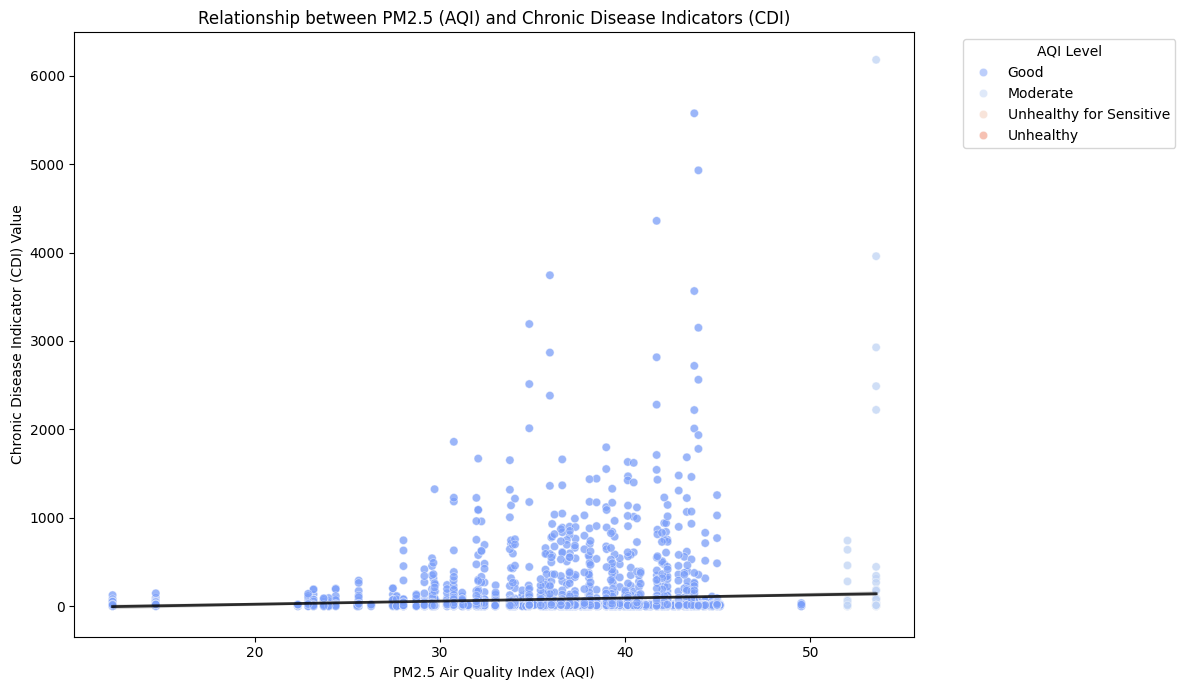

In [120]:
#Visual 1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure correct data types
combined_df['State'] = combined_df['State'].astype(str)
combined_df['Value'] = pd.to_numeric(combined_df['Value'], errors='coerce')
combined_df['AQI'] = pd.to_numeric(combined_df['AQI'], errors='coerce')

# Drop missing values
combined_df = combined_df.dropna(subset=['Value', 'AQI'])

# Dynamically define AQI bins
aqi_max = combined_df['AQI'].max()
bins = [0, 50, 100, 150, 200]
if aqi_max > 200:
    bins.append(aqi_max)

# Create AQI level categories
combined_df['AQI_Level'] = pd.cut(
    combined_df['AQI'],
    bins=bins,
    labels=['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy'][:len(bins)-1]
)

# Plot scatter + regression line
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=combined_df,
    x='AQI',
    y='Value',
    hue='AQI_Level',
    palette='coolwarm',
    alpha=0.5
)

# Add regression line
sns.regplot(
    data=combined_df,
    x='AQI',
    y='Value',
    scatter=False,
    color='black',
    line_kws={'linewidth':2, 'alpha':0.8}
)

plt.title('Relationship between PM2.5 (AQI) and Chronic Disease Indicators (CDI)')
plt.xlabel('PM2.5 Air Quality Index (AQI)')
plt.ylabel('Chronic Disease Indicator (CDI) Value')
plt.legend(title='AQI Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


*Answer to research question:*

The regression line shows a positive correlation between PM2.5 (AQI) and CDI values from 2019–2024. As air pollution levels increase, chronic disease rates also rise, indicating that poorer air quality is associated with higher health risks.

In [125]:
#Visual 2
# Mapping of U.S. state abbreviations to full names
state_name_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Apply mapping to your DataFrame
combined_df['State_Full'] = combined_df['State'].map(state_name_map)


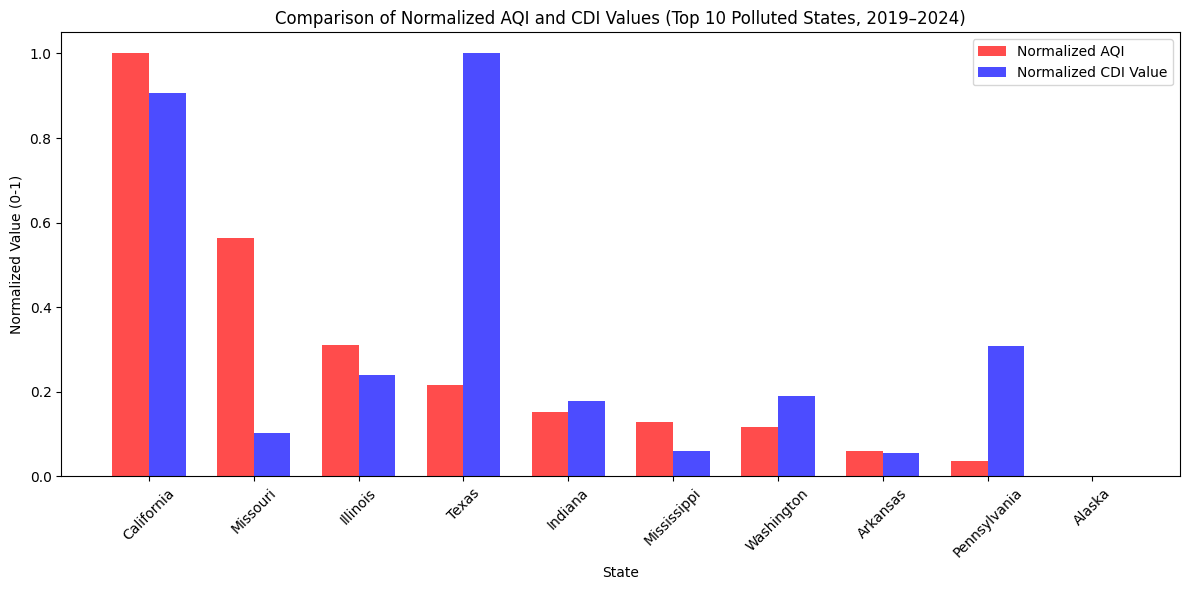

In [127]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
state_summary = combined_df.groupby('State_Full')[['AQI', 'Value']].mean().sort_values(by='AQI', ascending=False).head(10)

# Apply Min-Max normalization to scale both AQI and CDI between 0 and 1
scaler = MinMaxScaler()
state_summary_scaled = state_summary.copy()
state_summary_scaled[['AQI', 'Value']] = scaler.fit_transform(state_summary[['AQI', 'Value']])

# Create positions for side-by-side bars
x = np.arange(len(state_summary_scaled))
width = 0.35  # width of each bar

plt.figure(figsize=(12,6))

# Plot AQI bars
plt.bar(x - width/2, state_summary_scaled['AQI'], width, color='red', alpha=0.7, label='Normalized AQI')

# Plot CDI bars
plt.bar(x + width/2, state_summary_scaled['Value'], width, color='blue', alpha=0.7, label='Normalized CDI Value')

# Add labels and styling
plt.title('Comparison of Normalized AQI and CDI Values (Top 10 Polluted States, 2019–2024)')
plt.xlabel('State')
plt.ylabel('Normalized Value (0-1)')
plt.xticks(x, state_summary_scaled.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


*Answer to research question:*

This chart compares the average PM2.5 (AQI) and average Chronic Disease Index (CDI) values for the 10 most polluted U.S. states during 2019–2024.
We can observe that states with higher air pollution levels — such as California and Pennsylvania — generally show higher CDI values, indicating a positive correlation between poor air quality and chronic disease prevalence.

However, Texas is an exception, showing relatively low AQI but high CDI values, suggesting that factors other than air pollution, such as socioeconomic conditions or healthcare access, may also contribute to chronic disease rates.
Overall, the visualization reinforces the earlier finding of a positive relationship between PM2.5 levels and chronic disease prevalence, while highlighting the importance of considering additional contributing factors.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:*

If I had more time to complete the project, I would investigate the data quality and consistency further, especially addressing outliers like Texas and ensuring uniform coverage across all states and years. I would also consider increasing the range of years for which I collect data to observe longer-term trends. Additionally, I would explore other environmental factors beyond PM2.5, such as ozone or NO₂ levels, and examine socioeconomic and healthcare access variables to better understand confounding factors and refine the research question on drivers of chronic disease prevalence.